In [4]:
import pandas as pd
import glob
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def load_asd_data_with_pandas(data_path: str = "/content/drive/MyDrive/Antibody_Chekalin_Denis/asd") -> pd.DataFrame:
    """
    Загружает все parquet файлы из папки asd в один pandas DataFrame

    Args:
        data_path: путь к папке с данными

    Returns:
        pd.DataFrame: объединенный DataFrame со всеми данными
    """
    # Получаем все parquet файлы из папки
    parquet_files = glob.glob(os.path.join(data_path, "part-*.parquet"))

    if not parquet_files:
        raise ValueError(f"Не найдено parquet файлов в папке {data_path}")

    print(f"Найдено {len(parquet_files)} parquet файлов")

    # Загружаем все файлы в список DataFrame'ов
    dataframes = []
    for file_path in parquet_files:
        # print(f"Загружаем файл: {os.path.basename(file_path)}")
        df = pd.read_parquet(file_path)
        dataframes.append(df)

    # Объединяем все DataFrame'ы в один
    combined_df = pd.concat(dataframes, ignore_index=True)

    print(f"Общий размер данных: {combined_df.shape}")
    print(f"Колонки: {list(combined_df.columns)}")

    return combined_df

# Загружаем данные
agab_df = load_asd_data_with_pandas('./asd')

Найдено 20 parquet файлов
Общий размер данных: (1227083, 11)
Колонки: ['dataset', 'heavy_sequence', 'light_sequence', 'scfv', 'affinity_type', 'affinity', 'antigen_sequence', 'confidence', 'nanobody', 'metadata', 'processed_measurement']


In [7]:
paired_agab_df = agab_df[
    agab_df['light_sequence'].str.len() > 10
    & (agab_df['nanobody'] == False)
    & (agab_df['scfv'] == False)
]
print(len(paired_agab_df)) # 713 227 — 'scFv' + VL > 10;  901 853 — scFv 

795755


In [11]:
less10 = agab_df[
    (agab_df['light_sequence'].str.len() < 10)
    & (agab_df['nanobody'] == False)
    & (agab_df['scfv'] == False)
]
less10.head()
less10['heavy_sequence'].head(1).values[0]

'QVQLQQSGAELARPGASVTLSCKASGYTFTDYEMHWVKQTPVHGLEWIGAIDPETGGTAYNQKFKGKATLTADKSSSTAYMELRSLTSEDSAVYYCTRDYYGSNYLAWFAYWGQGTLVTVSA'

In [12]:
less10.dataset.value_counts()

dataset
covid-19    54625
hiv         48008
met          4000
biomap       2725
aae            35
Name: count, dtype: int64

In [ ]:
less10[less10['dataset'] == 'biomap'].head(5)

,dataset,heavy_sequence,light_sequence,scfv,affinity_type,affinity,antigen_sequence,confidence,nanobody,metadata,processed_measurement
53225,biomap,EISEVQLVESGGGLVQPGGSLRLSCVTSGFTFRKFGMSWVRQAPGK...,,False,delta_g,-9.1,GEKKGNYVVTTH,very_high,False,"{'target_name': None, 'target_pdb': '', 'targe...",-9.1
53226,biomap,EISEVQLVESGGGLVQPGGSLRLSCVTSGFTFRKFGMSWVRQAPGK...,,False,delta_g,-9.1,GEKKGNYVVTTH,very_high,False,"{'target_name': None, 'target_pdb': '', 'targe...",-9.1
53347,biomap,EVQLVESGGGLVQPGGSLRLSCAASGFTFSRYTMSWVRQAPGKGLE...,,False,delta_g,-9.84,QLDIVIVLDGSNSIYPWESVIAFLNDLLKRMDIGPKQTQVGIVQYG...,very_high,False,"{'target_name': None, 'target_pdb': '', 'targe...",-9.84
53348,biomap,EVQLVESGGGLVQPGGSLRLSCAASGFTFSRYTMSWVRQAPGKGLE...,,False,delta_g,-9.84,QLDIVIVLDGSNSIYPWESVIAFLNDLLKRMDIGPKQTQVGIVQYG...,very_high,False,"{'target_name': None, 'target_pdb': '', 'targe...",-9.84
53349,biomap,EVQLVESGGGLVQPGGSLRLSCAASGFTFSRYTMVWVRQAPGKGLE...,,False,delta_g,-2.999,TQLDIVIVLDGSNSIYPWESVIAFLNDLLKRMDIGPKQTQVGIVQY...,very_high,False,"{'target_name': None, 'target_pdb': '', 'targe...",-2.999


Количество записей с длиной Light Chain > 200: 666638


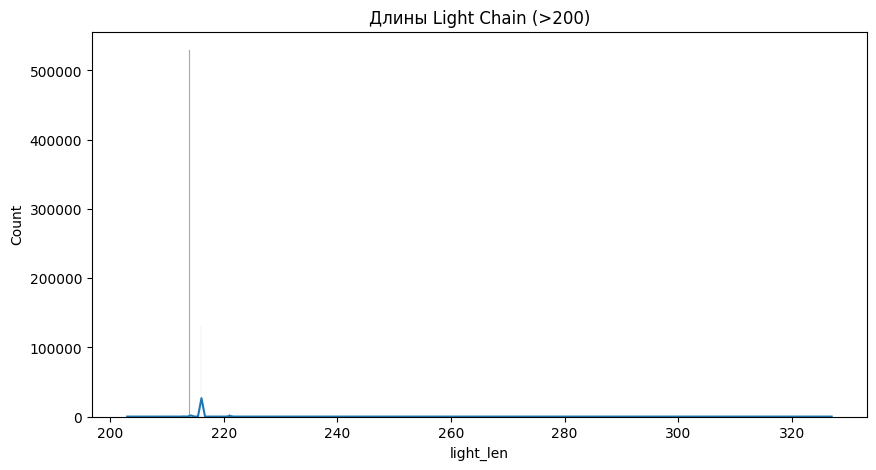

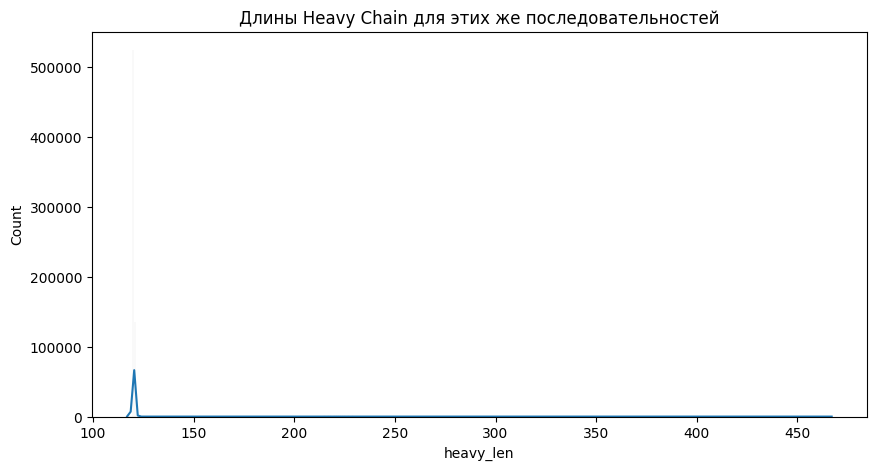

,heavy_len,light_len,heavy_sequence,light_sequence,scfv,nanobody
1117318,120,214,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,False
758531,120,214,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,False
138323,120,214,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,False
693695,120,214,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,False
1006562,120,214,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,False


In [5]:
# Фильтрация: подозрительно длинные light chain
long_light = paired_agab_df[
    paired_agab_df['light_sequence'].notna() &
    (paired_agab_df['light_sequence'].str.len() > 200)
]

print("Количество записей с длиной Light Chain > 200:", len(long_light))

# Добавляем длины для анализа
long_light = long_light.assign(
    light_len=long_light['light_sequence'].str.len(),
    heavy_len=long_light['heavy_sequence'].str.len()
)

# Гистограммы длин
plt.figure(figsize=(10, 5))
sns.histplot(long_light['light_len'], kde=True)
plt.title("Длины Light Chain (>200)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(long_light['heavy_len'], kde=True)
plt.title("Длины Heavy Chain для этих же последовательностей")
plt.show()

# Показываем примерные строки
cols = ["heavy_len", "light_len", "heavy_sequence", "light_sequence", "scfv", "nanobody"]
display(long_light[cols].sample(5))